In [ ]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
import seaborn as sns
import datetime as dt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
from statsmodels.tsa.stattools import grangercausalitytests
from random import gauss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta
import scipy.optimize as spop
import scipy.stats as stats
import warnings
from google.colab import drive
drive.mount('/content/gdrive')
sns.set()

warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# file paths
BTC_path = '/content/gdrive/MyDrive/DL_Final_Project/Prices/BTC.csv'
ETH_path = '/content/gdrive/MyDrive/DL_Final_Project/Prices/ETH.csv'
DOGE_path = '/content/gdrive/MyDrive/DL_Final_Project/Prices/DOGE.csv'

BTC = pd.read_csv(BTC_path)
ETH = pd.read_csv(ETH_path)
DOGE = pd.read_csv(DOGE_path)

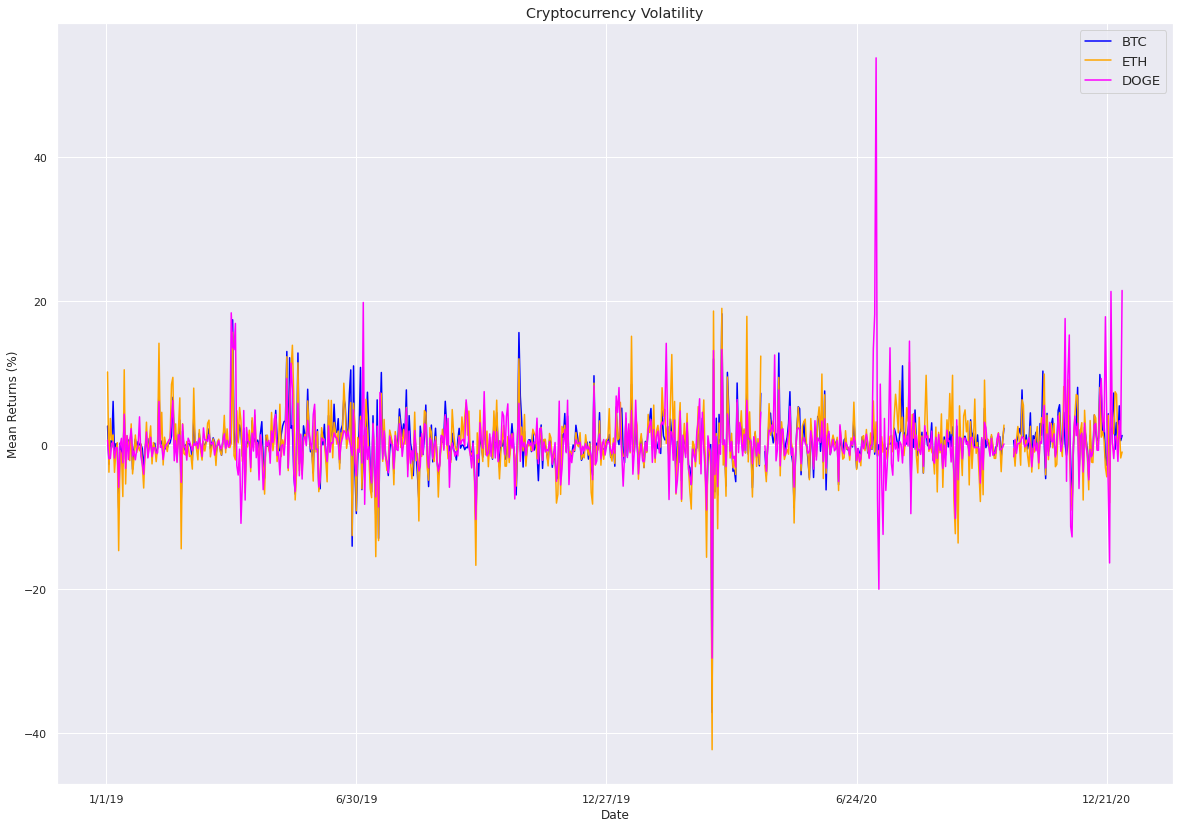

In [ ]:
plt.rcParams['figure.figsize'] = (20, 14)

plt.plot('Date', 'Returns', data = BTC, label = 'BTC', color = "blue")
plt.plot('Date', 'Returns', data = ETH, label = 'ETH', color = "orange")
plt.plot('Date', 'Returns', data = DOGE, label = 'DOGE', color = "magenta")

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2.5})
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Returns (%)')
plt.title('Cryptocurrency Volatility')
plt.xticks(np.arange(0, 729, 180))

plt.show()

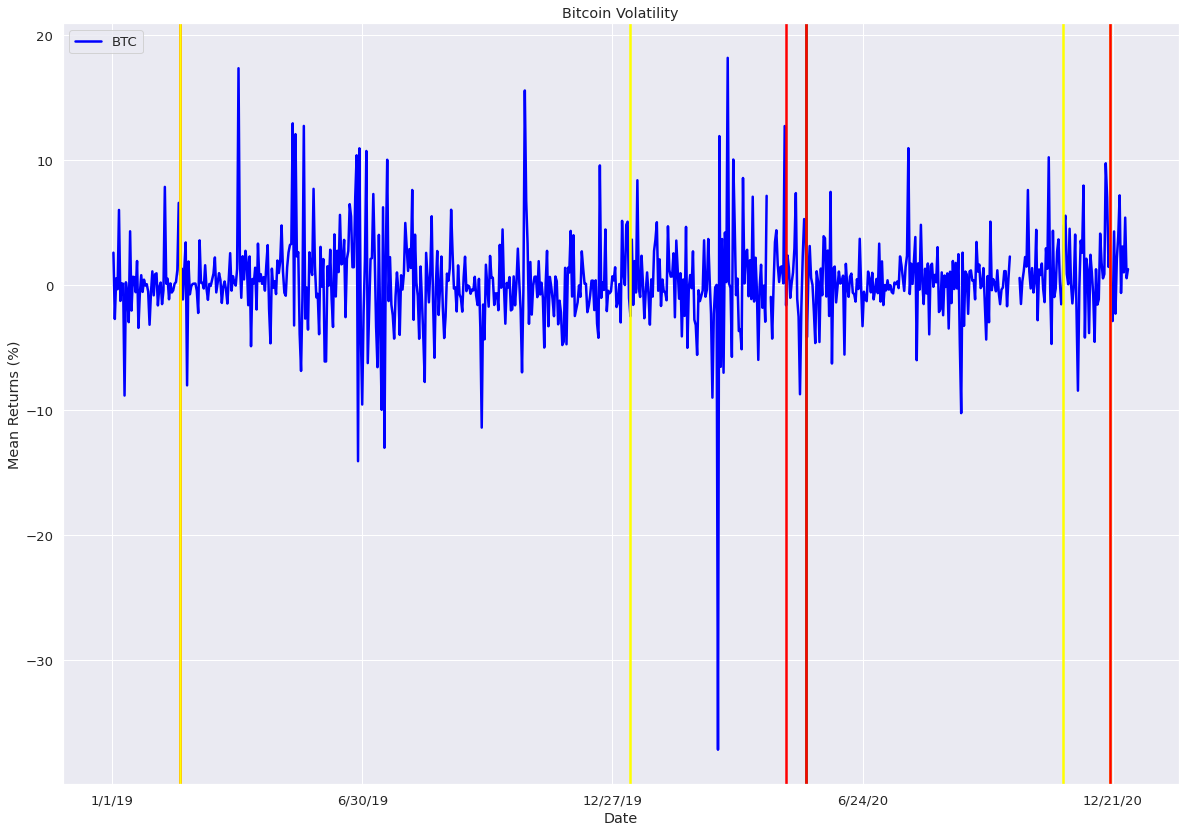

In [ ]:
# Graph for Bitcoin Mean-Returns - includes Musk Twitter Factor

plt.plot('Date', 'Returns', data = BTC, label = 'BTC', color = "blue")

plt.rcParams['figure.figsize'] = (20, 14)

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2.5})
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Returns (%)')
plt.title('Bitcoin Volatility')
plt.xticks(np.arange(0, 729, 180))

# Tweets:

# tweet on feb 21 2019, 50 diff
# he tweeted twice
plt.axvline(49, -50, 300, c = 'red')
plt.axvline(49, -50, 300, c = 'yellow')
# tweet on jan 10 2020, 374 diff
plt.axvline(373, -50, 300, c = 'yellow')
# tweet on may 1 2020, 486 diff
plt.axvline(485, -50, 300, c = 'red')
# tweet on may 15 2020, 500 diff
# he tweeted twice
plt.axvline(499, -50, 300, c = 'green')
plt.axvline(499, -50, 300, c = 'red')
# tweet on nov 16 2020, 685 diff
plt.axvline(684, -50, 300, c = 'yellow')
# tweet on dec 20 2020, 719 diff
# he tweeted twice
plt.axvline(718, -50, 300, c = 'yellow')
plt.axvline(718, -50, 300, c = 'red')

plt.show()

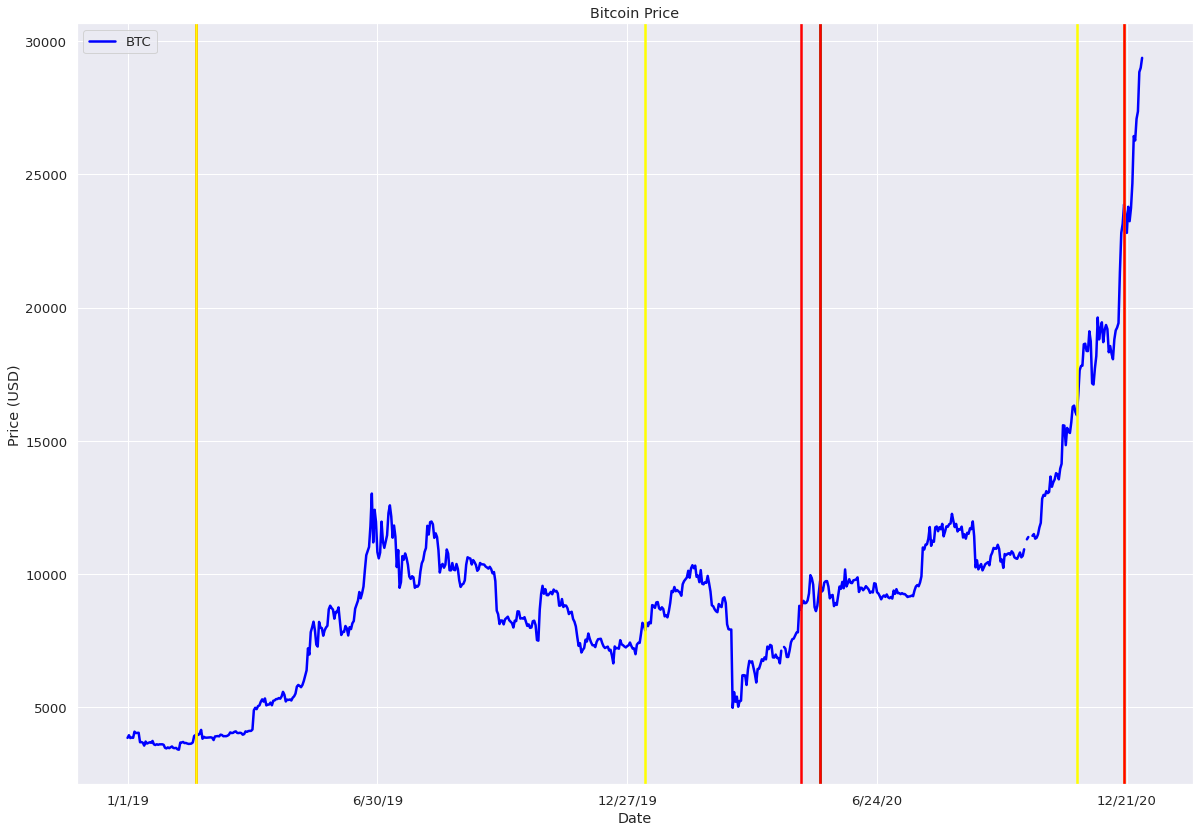

In [ ]:
# Graph for Bitcoin Price - includes Musk Twitter Factor

plt.plot('Date', 'Adj Close', data = BTC, label = 'BTC', color = "blue")

plt.rcParams['figure.figsize'] = (20, 14)

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2.5})
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price')
plt.xticks(np.arange(0, 729, 180))

# Tweets:

# tweet on feb 21 2019, 50 diff
# he tweeted twice
plt.axvline(49, -50, 300, c = 'red')
plt.axvline(49, -50, 300, c = 'yellow')
# tweet on jan 10 2020, 374 diff
plt.axvline(373, -50, 300, c = 'yellow')
# tweet on may 1 2020, 486 diff
plt.axvline(485, -50, 300, c = 'red')
# tweet on may 15 2020, 500 diff
# he tweeted twice
plt.axvline(499, -50, 300, c = 'green')
plt.axvline(499, -50, 300, c = 'red')
# tweet on nov 16 2020, 685 diff
plt.axvline(684, -50, 300, c = 'yellow')
# tweet on dec 20 2020, 719 diff
# he tweeted twice
plt.axvline(718, -50, 300, c = 'yellow')
plt.axvline(718, -50, 300, c = 'red')

plt.show()

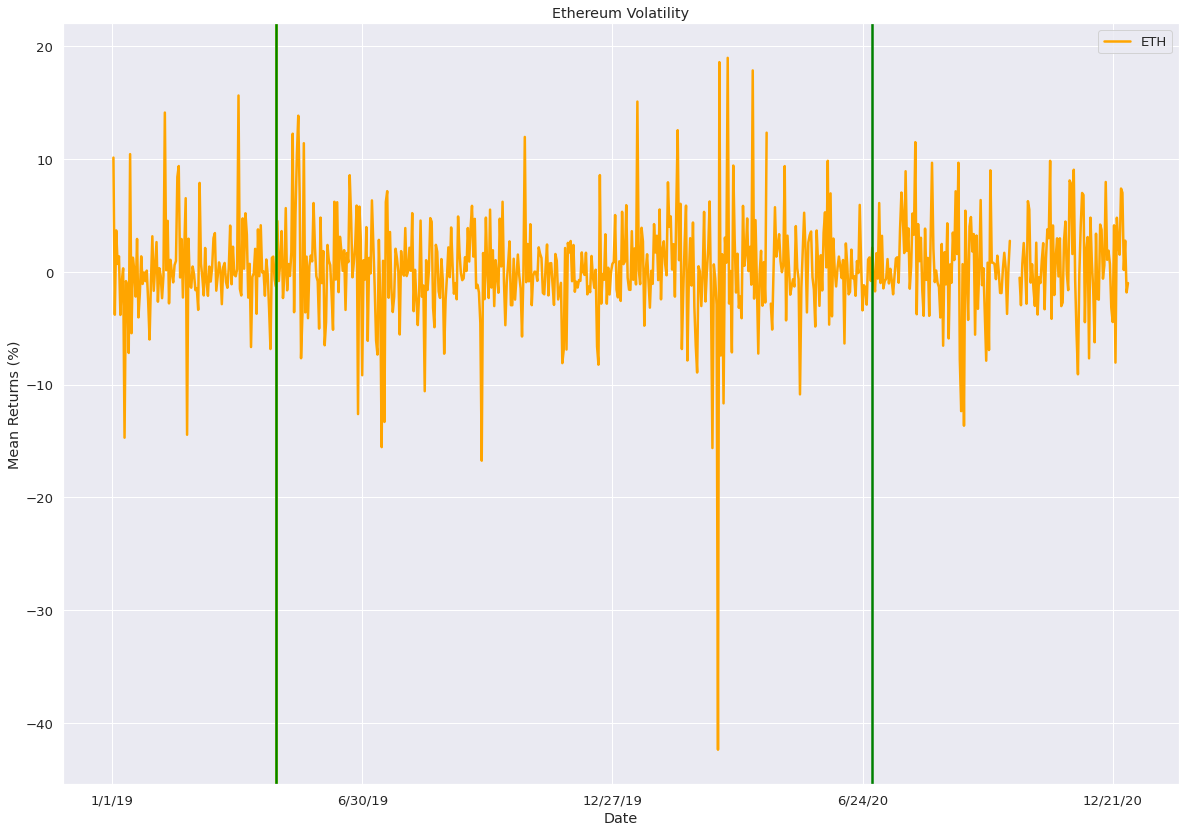

In [ ]:
# Graph for Ethereum Mean-Returns - includes Musk Twitter Factor

plt.plot('Date', 'Returns', data = ETH, label = 'ETH', color = "orange")

plt.rcParams['figure.figsize'] = (20, 14)

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2.5})
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Returns (%)')
plt.title('Ethereum Volatility')
plt.xticks(np.arange(0, 729, 180))

# Tweets:

# tweet on apr 30 2019, 119 diff
# he tweeted three times
plt.axvline(118, -50, 300, c = 'yellow')
plt.axvline(118, -50, 300, c = 'yellow')
plt.axvline(118, -50, 300, c = 'green')
# tweet on july 2 2020, 548 diff
plt.axvline(547, -50, 300, c = 'green')


plt.show()

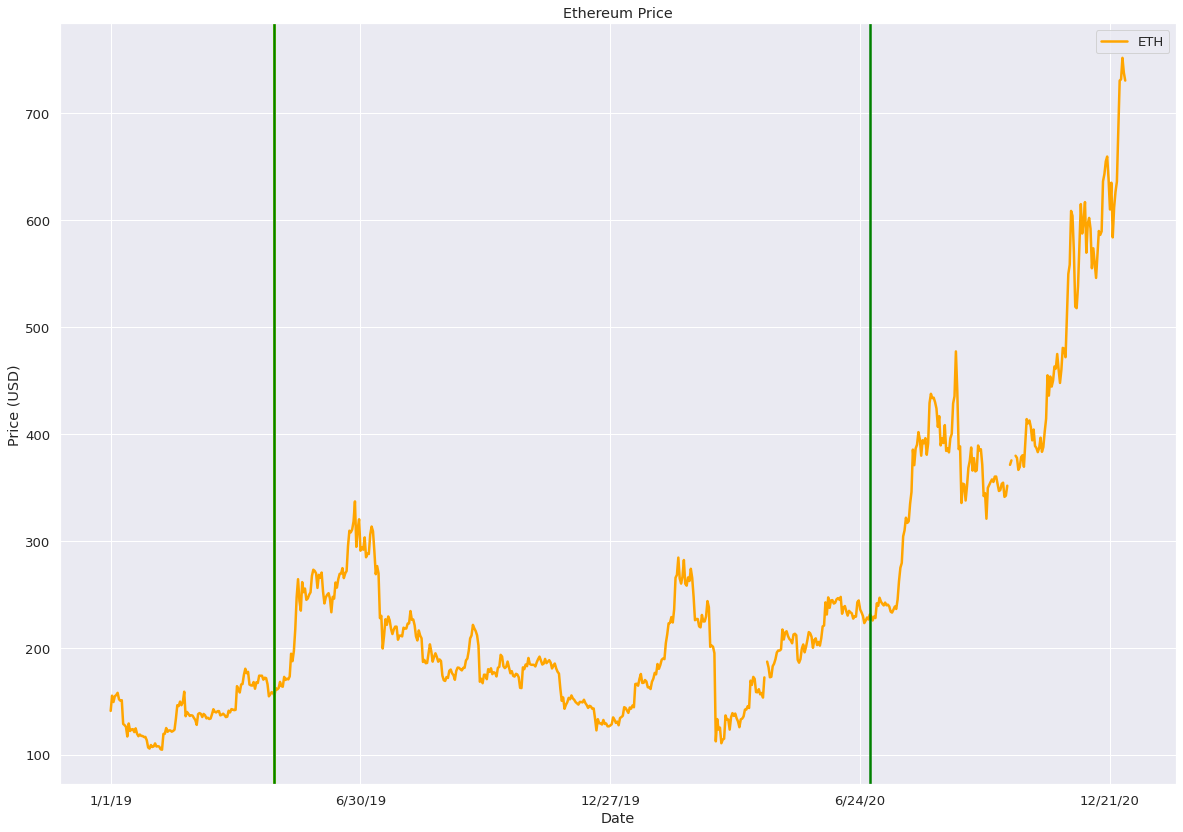

In [ ]:
# Graph for Etherium Price - includes Musk Twitter Factor

plt.plot('Date', 'Adj Close', data = ETH, label = 'ETH', color = "orange")

plt.rcParams['figure.figsize'] = (20, 14)

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2.5})
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Ethereum Price')
plt.xticks(np.arange(0, 729, 180))

# Tweets:

# tweet on apr 30 2019, 119 diff
# he tweeted three times
plt.axvline(118, -50, 300, c = 'yellow')
plt.axvline(118, -50, 300, c = 'yellow')
plt.axvline(118, -50, 300, c = 'green')
# tweet on july 2 2020, 548 diff
plt.axvline(547, -50, 300, c = 'green')

plt.show()

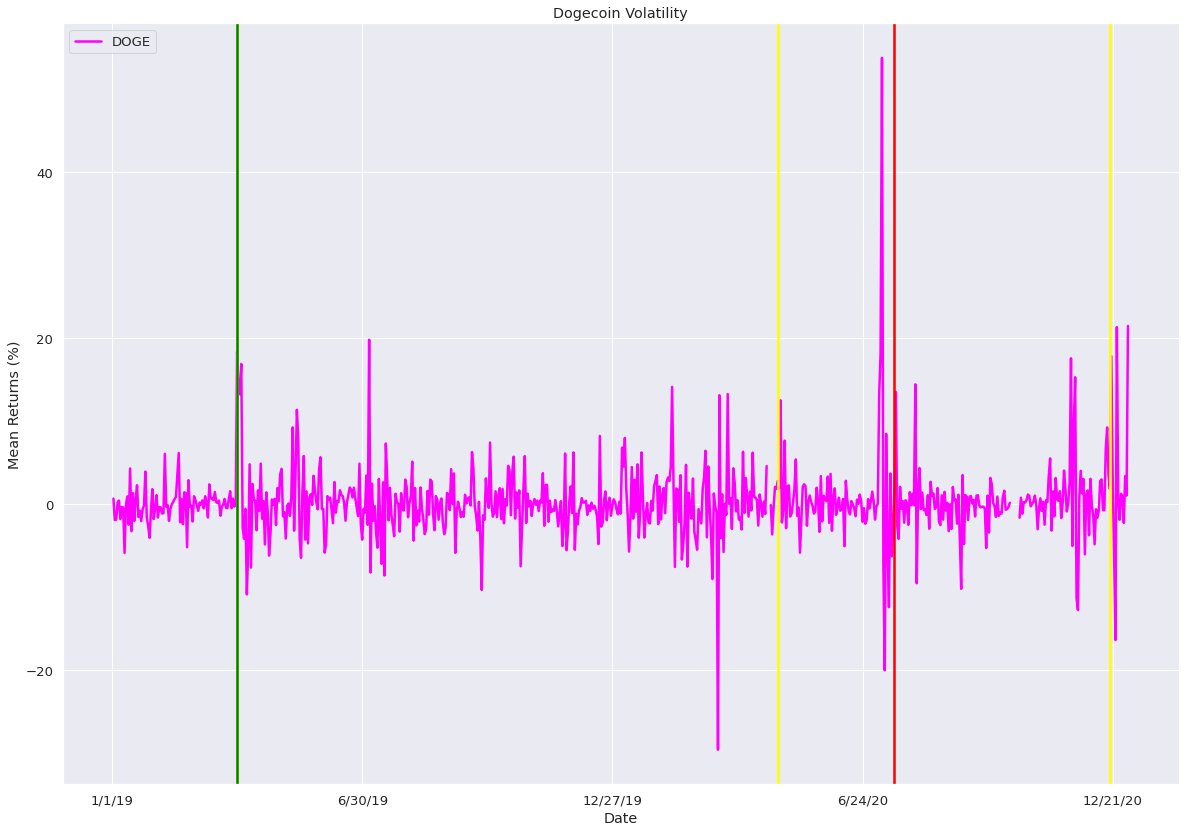

In [ ]:
# Graph for Dogecoin Mean-Returns - includes Musk Twitter Factor

plt.plot('Date', 'Returns', data = DOGE, label = 'DOGE', color = "magenta")

plt.rcParams['figure.figsize'] = (20, 14)

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2.5})
plt.legend()
plt.xlabel('Date')
plt.ylabel('Mean Returns (%)')
plt.title('Dogecoin Volatility')
plt.xticks(np.arange(0, 729, 180))

# Tweets:

# tweet on apr 2 2019, 91 diff
# he tweeted three times
plt.axvline(90, -50, 300, c = 'yellow')
plt.axvline(90, -50, 300, c = 'yellow')
plt.axvline(90, -50, 300, c = 'green')
# tweet on apr 25 2020, 480 diff
plt.axvline(479, -50, 300, c = 'yellow')
# tweet on jul 18 2020, 564 diff
plt.axvline(563, -50, 300, c = 'red')
# tweet on dec 20 2020, 719 diff
plt.axvline(718, -50, 300, c = 'yellow')


plt.show()

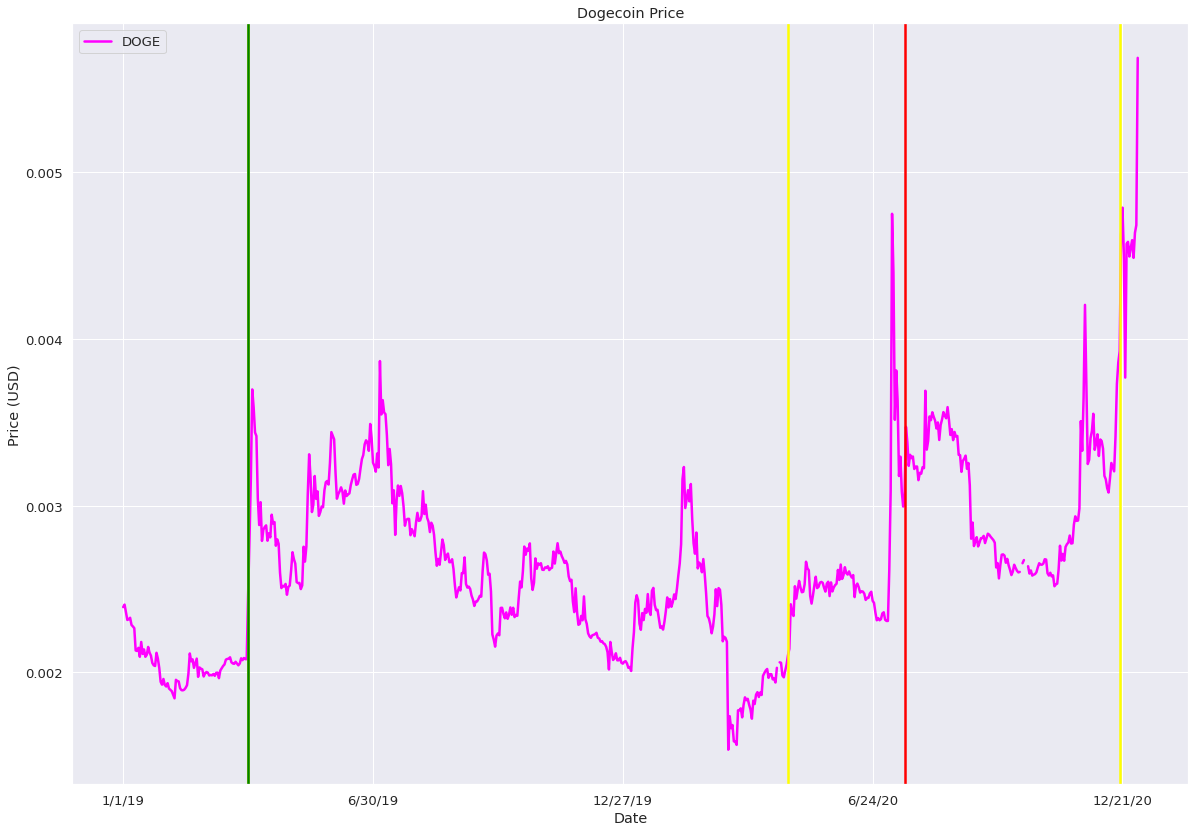

In [ ]:
# Graph for Dogecoin Price - includes Musk Twitter Factor

plt.plot('Date', 'Adj Close', data = DOGE, label = 'DOGE', color = "magenta")

plt.rcParams['figure.figsize'] = (20, 14)


sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth":2.5})
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Dogecoin Price')
plt.xticks(np.arange(0, 729, 180))

# Tweets:

# tweet on apr 2 2019, 91 diff
# he tweeted three times
plt.axvline(90, -50, 300, c = 'yellow')
plt.axvline(90, -50, 300, c = 'yellow')
plt.axvline(90, -50, 300, c = 'green')
# tweet on apr 25 2020, 480 diff
plt.axvline(479, -50, 300, c = 'yellow')
# tweet on jul 18 2020, 564 diff
plt.axvline(563, -50, 300, c = 'red')
# tweet on dec 20 2020, 719 diff
plt.axvline(718, -50, 300, c = 'yellow')

plt.show()

In [ ]:
# Granger Causality Test - Musk Tweet Impact on BTC Price
t_btc = BTC["Adj Close"]
dummy_btc = BTC["Tweet Shock"]

ts_df1 = pd.DataFrame(columns=['t_btc', 'dummy_btc'], data=zip(t_btc, dummy_btc))

ts_df1 = ts_df1.dropna()
ts_df1

gc_res1 = grangercausalitytests(ts_df1, 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.2571  , p=0.0394  , df_denom=724, df_num=1
ssr based chi2 test:   chi2=4.2747  , p=0.0387  , df=1
likelihood ratio test: chi2=4.2622  , p=0.0390  , df=1
parameter F test:         F=4.2571  , p=0.0394  , df_denom=724, df_num=1


In [ ]:
# Granger Causality Test - Musk Tweet Impact on ETH Price
t_eth = ETH["Adj Close"]
dummy_eth = ETH["Tweet Shock"]

ts_df2 = pd.DataFrame(columns=['t_eth', 'dummy_eth'], data=zip(t_eth, dummy_eth))

ts_df2 = ts_df2.dropna()
ts_df2

gc_res2 = grangercausalitytests(ts_df2, 4)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7233  , p=0.3953  , df_denom=724, df_num=1
ssr based chi2 test:   chi2=0.7263  , p=0.3941  , df=1
likelihood ratio test: chi2=0.7260  , p=0.3942  , df=1
parameter F test:         F=0.7233  , p=0.3953  , df_denom=724, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.4650  , p=0.2318  , df_denom=721, df_num=2
ssr based chi2 test:   chi2=2.9504  , p=0.2287  , df=2
likelihood ratio test: chi2=2.9444  , p=0.2294  , df=2
parameter F test:         F=1.4650  , p=0.2318  , df_denom=721, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0846  , p=0.1009  , df_denom=718, df_num=3
ssr based chi2 test:   chi2=6.3146  , p=0.0973  , df=3
likelihood ratio test: chi2=6.2873  , p=0.0984  , df=3
parameter F test:         F=2.0846  , p=0.1009  , df_denom=718, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9274  , p=0.1041  

In [ ]:
# Granger Causality Test - Musk Tweet Impact on DOGE Price
t_doge = DOGE["Adj Close"]
dummy_doge = DOGE["Tweet Shock"]

ts_df3 = pd.DataFrame(columns=['t_doge', 'dummy_doge'], data=zip(t_doge, dummy_doge))

ts_df3 = ts_df3.dropna()
ts_df3

gc_res3 = grangercausalitytests(ts_df3, 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.3702  , p=0.0068  , df_denom=724, df_num=1
ssr based chi2 test:   chi2=7.4007  , p=0.0065  , df=1
likelihood ratio test: chi2=7.3633  , p=0.0067  , df=1
parameter F test:         F=7.3702  , p=0.0068  , df_denom=724, df_num=1
